In [1]:
import pandas as pd
import plotly.express as px  # (version 4.7.0)
import plotly.graph_objects as go

import dash  # (version 1.12.0) pip install dash
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output

from datetime import date

In [2]:
data = pd.read_csv('data/percent_positive_by_agegrp.csv')
print(data['age_category'].unique())
data.head()

['0to13' '14to17' '18to24' '25to64' '65+']


,DATE,age_category,percent_positive_7d_avg
0,01-May-20,0to13,0.0340
1,02-May-20,0to13,0.0350
2,03-May-20,0to13,0.0360
3,04-May-20,0to13,0.0359
4,05-May-20,0to13,0.0355


## Data Exploration

Things to investigate:
- distribution of positives by age category
- time series comparison
- 

In [3]:
data.groupby(['age_category']).describe()

percent_positive_7d_avg                                        \
                               count      mean       std     min       25%   
age_category                                                                 
0to13                          252.0  0.029365  0.030076  0.0051  0.009275   
14to17                         252.0  0.036362  0.030307  0.0067  0.014275   
18to24                         252.0  0.031844  0.021971  0.0048  0.010375   
25to64                         252.0  0.024693  0.017879  0.0042  0.007775   
65+                            252.0  0.020341  0.016060  0.0023  0.004700   

                                         
                  50%       75%     max  
age_category                             
0to13         0.02305  0.039025  0.1767  
14to17        0.02280  0.057100  0.1513  
18to24        0.03165  0.050550  0.0969  
25to64        0.02045  0.039325  0.0684  
65+           0.01630  0.033125  0.0557

In [4]:
data['DATE'] = pd.to_datetime(data['DATE'])
data

,DATE,age_category,percent_positive_7d_avg
0,2020-05-01,0to13,0.0340
1,2020-05-02,0to13,0.0350
2,2020-05-03,0to13,0.0360
3,2020-05-04,0to13,0.0359
4,2020-05-05,0to13,0.0355
...,...,...,...
1255,2021-01-03,65+,0.0532
1256,2021-01-04,65+,0.0526
1257,2021-01-05,65+,0.0537
1258,2021-01-06,65+,0.0549


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%d')


cats = data['age_category'].unique()

fig, axs = plt.subplots(3, 2, figsize=(20, 30))

for i, cat in enumerate(cats):
    a = i//2
    b = i%2
    
    x = pd.to_datetime(data[data['age_category'] == cat]['DATE']).sort_values().values
    y = data[data['age_category'] == cat]['percent_positive_7d_avg'].values
    
    axs[a, b].plot(x, y)
    axs[a, b].set_title(cat)
    
    xt_idx = list(range(0,len(x),1))
    #print(xt_idx)
    #axs[a, b].xticks(xt_idx, [x[k] for k in xt_idx])
    
    #print('xticks:',xt_idx)
    #print('x labels:',[x[k] for k in xt_idx])
    
   # axs[a, b].xaxis.set_major_formatter(myFmt)
    
    #axs[a, b].set_xticks(range(len(x))) 
    #axs[a, b].set_xticklabels([str(x[k])[:10] for k in xt_idx], fontsize=12)

#     xticks(np.arange(12), calendar.month_name[1:13], rotation=20)
    
# for ax in axs.flat:
#     ax.set(xlabel='x-label', ylabel='y-label')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()


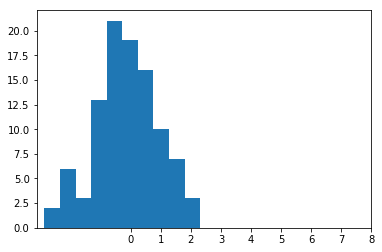

In [6]:
fig, ax = plt.subplots(1)
ax.hist(np.random.randn(100))
ax.set_xticks(range(9))

In [7]:
# data cleaning/exploration

In [8]:
#data.groupby('DATE').sum().reset_index()

In [9]:
[{"label":col, "value":col} for col in data['age_category'].unique()]

[{'label': '0to13', 'value': '0to13'},
 {'label': '14to17', 'value': '14to17'},
 {'label': '18to24', 'value': '18to24'},
 {'label': '25to64', 'value': '25to64'},
 {'label': '65+', 'value': '65+'}]

In [10]:
app = JupyterDash(__name__)
my_options = [{"label":col, "value":col} for col in data['age_category'].unique()]

app.layout = html.Div([

    html.H1("COVID-19 Dashboard", style={'text-align': 'center'}),
    
   

    dcc.Dropdown(id="age_group",
                 options=my_options,
                 multi=True,
                 value=[my_options[0]['value']],
                 style={'width': "40%"}
                 ),

    html.Div(id='select_ref', children=[]),
    html.Br(),
    
    dcc.DatePickerRange(
        id='date-picker-range',
        start_date=date(2020, 1, 1),
        end_date=date(2020, 12, 1),
        end_date_placeholder_text='Select a date!'
    ),

    dcc.Graph(
        id='graph1', 
        figure={},
    )

])

# @app.callback(
#     [Output(component_id='select_ref', component_property='children'),
#      Output(component_id='graph1', component_property='figure')],
#     [Input(component_id='age_group', component_property='value')]
# )
# # 1. callback selects value, 
# # 2. value is sent to function (defined after callback)
# # 3. function returned values go into the output of callback

# def update_graph_response(option_slctd):
#     #option_slctd = 2017
#     print(option_slctd)
#     print(type(option_slctd))

#     select_ref = "The age group chosen by user: {}".format(option_slctd)
    
#     df = data[data['age_category'].isin(option_slctd)] #.groupby('DATE').sum().reset_index()
#     df['DATE'] = pd.to_datetime(df['DATE'])
#     df = df.sort_values('DATE')

#     fig = px.line(
#         data_frame = df,
#         x = 'DATE',
#         y = 'percent_positive_7d_avg',
#         color = 'age_category'
#     )


#     fig.update_xaxes(tickangle=90, nticks=20)
#     fig.update_layout(width=int(700))



#     return select_ref, fig

@app.callback(
    [Output(component_id='select_ref', component_property='children'),
     Output(component_id='graph1', component_property='figure')],
    [Input(component_id='age_group', component_property='value'),
     Input(component_id='date-picker-range', component_property='start_date'),
     Input(component_id='date-picker-range', component_property='end_date')]
)

def update_graph_date(option_slctd, start, end):
    select_ref = "The age group chosen by user: {}".format(option_slctd)
    
    
    sdt = pd.to_datetime(start)
    edt = pd.to_datetime(end)
    
    df = data[(data['age_category'].isin(option_slctd)) & (data['DATE'] >= sdt) & (data['DATE'] <= edt)] #.groupby('DATE').sum().reset_index()
    df = df.sort_values('DATE')
    print(df.head())

    if df.shape[0] == 0:
        fig = px.line()
    else:
        fig = px.line(
            data_frame = df,
            x = 'DATE',
            y = 'percent_positive_7d_avg',
            color = 'age_category'
        )


    fig.update_xaxes(tickangle=90, nticks=20)
    fig.update_layout(width=int(700))
    
    return select_ref, fig

app.run_server(mode='external')

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/Users/stephenbrock/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/Users/stephenbrock/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/retrying.py", line 49, in wrapped_f
    return Retrying(*dargs, **dkw).call(f, *args, **kw)
  File "/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/retrying.py", line 212, in call
    raise attempt.get()
  File "/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/retrying.py", line 247, in get
    six.reraise(self.value[0], self.value[1], self.value[2])
  File "/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/six.py", line 703, in reraise
    raise value
  File "/Users/stephenbrock/anaconda3/lib/python3.6/site-packages/retrying.py", line 200, in call
    attempt = Attempt(fn(*args, **kwargs), at

OSError: Address 'http://127.0.0.1:8050' already in use.
    Try passing a different port to run_server.

In [2]:
import pandas as pd
odata = pd.read_csv('../data/on_cases_by_region.csv')

In [4]:
print(odata.columns)
print(odata['PHU_NAME'].unique())

Index(['_id', 'FILE_DATE', 'PHU_NAME', 'PHU_NUM', 'ACTIVE_CASES',
       'RESOLVED_CASES', 'DEATHS'],
      dtype='object')
['HALIBURTON, KAWARTHA, PINE RIDGE' 'HALTON REGION'
 'HASTINGS & PRINCE EDWARD COUNTIES' 'HURON PERTH'
 'KINGSTON, FRONTENAC, LENNOX & ADDINGTON' 'LAMBTON COUNTY'
 'LEEDS, GRENVILLE AND LANARK DISTRICT' 'MIDDLESEX-LONDON'
 'NIAGARA REGION' 'NORTH BAY PARRY SOUND DISTRICT' 'NORTHWESTERN'
 'OXFORD ELGIN-ST.THOMAS' 'PEEL REGION' 'PETERBOROUGH COUNTY-CITY'
 'PORCUPINE' 'RENFREW COUNTY AND DISTRICT' 'SIMCOE MUSKOKA DISTRICT'
 'SUDBURY AND DISTRICT' 'THUNDER BAY DISTRICT' 'TIMISKAMING' 'TORONTO'
 'WATERLOO REGION' 'WELLINGTON-DUFFERIN-GUELPH' 'WINDSOR-ESSEX COUNTY'
 'YORK REGION' 'ALGOMA DISTRICT' 'BRANT COUNTY' 'CHATHAM-KENT'
 'CITY OF HAMILTON' 'CITY OF OTTAWA' 'DURHAM REGION' 'EASTERN ONTARIO'
 'GREY BRUCE' 'HALDIMAND-NORFOLK']


In [ ]:
# approximation
todata = odata[odata['PHU_NAME'] == 'TORONTO']
todata['new_cases'] = todata['ACTIVE_CASES']